In [73]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [74]:
epl = pd.read_csv("data.csv")

In [75]:
epl.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [76]:
epl.drop(epl.columns[0], axis=1, inplace=True) #Remove 1st column

In [77]:
epl.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [78]:
# DataFrame of Class 1
seizure_data = epl[epl['y'] == 1]
seizure_data = seizure_data.reset_index(drop = True)

In [79]:
# DataFrame of Class 2
group2_data = epl[epl['y'] == 2]
group2_data = group2_data.reset_index(drop = True)

In [80]:
# DataFrame of Class 3
group3_data = epl[epl['y'] == 3]
group3_data = group3_data.reset_index(drop = True)

In [81]:
# DataFrame of Class 4
group4_data = epl[epl['y'] == 4]
group4_data = group4_data.reset_index(drop = True)

In [82]:
# DataFrame of Class 5
group5_data = epl[epl['y'] == 5]
group5_data = group5_data = group5_data.reset_index(drop = True)

In [83]:
group5_data.head()#test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
1,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
2,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
3,55,28,18,16,16,19,25,40,52,66,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
4,-5,15,28,28,9,-29,-41,-19,14,30,...,-38,-4,25,16,-16,-74,-101,-89,-49,5


In [84]:
group2 = pd.concat([seizure_data,group2_data],ignore_index=True)

group3 = pd.concat([seizure_data,group3_data],ignore_index=True)

group4 = pd.concat([seizure_data,group4_data],ignore_index=True)

group5 = pd.concat([seizure_data,group5_data],ignore_index=True)

In [85]:
group2_train = group2.sample(frac=0.8)
group2_test = group2.sample(frac=0.2)

In [86]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth = 8)

# Extract the two variables X_train and y_train
y_train = pd.DataFrame(group2_train['y'])
X_train = pd.DataFrame(group2_train)
X_train = X_train.drop(columns = ['y'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

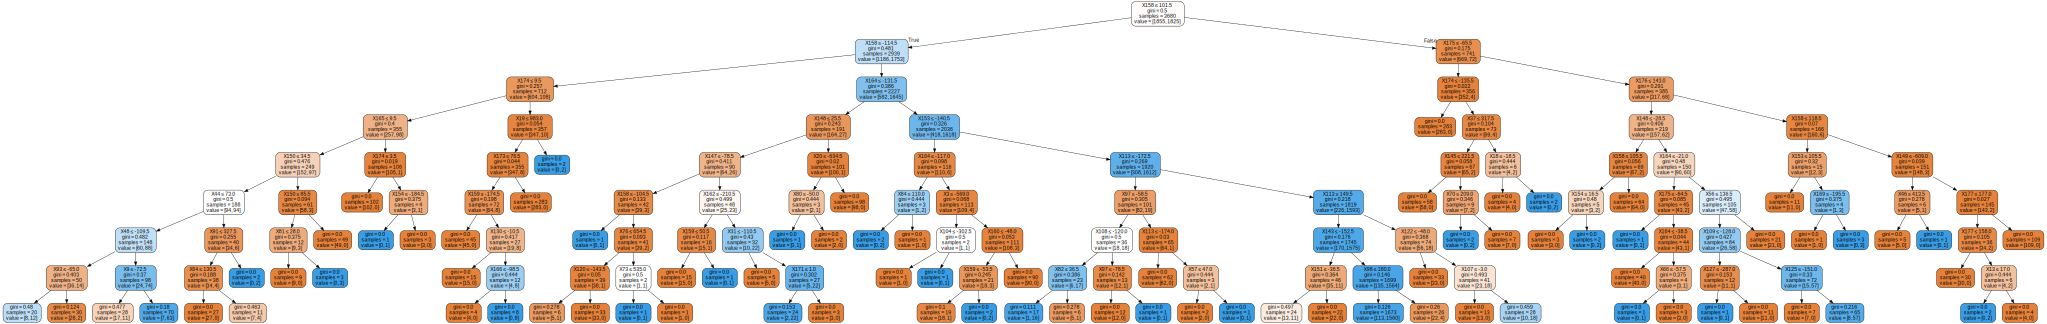

In [87]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz #Visualisation
graphviz.Source(treedot)

Classification Accuracy (Group 2 Train Set) 	: 0.95


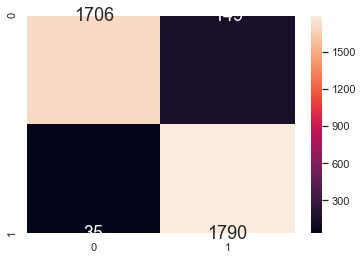

In [88]:
# Predict Response w.r.t Predictors
y_train_pred = dectree.predict(X_train)

# Classification Accuracy
print("Classification Accuracy (Group 2 Train Set) \t:", dectree.score(X_train, y_train))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy (Group 2 Test Set) 	: 0.9282608695652174
Cross validation score :  0.8620007038309984


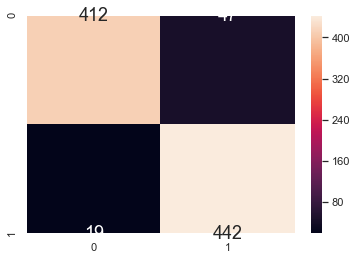

In [89]:
# Extract the two variables X_test and y_test
y_test = pd.DataFrame(group2_test['y'])
X_test = pd.DataFrame(group2_test)
X_test = X_test.drop(columns=['y'])

# Predict Response w.r.t Predictors
y_test_pred = dectree.predict(X_test)
 
# Classification Accuracy
print("Classification Accuracy (Group 2 Test Set) \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 8,n_estimators = 100)
rf.fit(X_train, y_train)

y_train_preds = rf.predict_proba(X_train)[:,1]
y_test_preds = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score
roc_train = roc_auc_score(y_train,y_train_preds)
print("ROC AUC Score for Group 2 Train Set: ",roc_train)

roc_test = roc_auc_score(y_test,y_test_preds)
print("ROC AUC Score for Group 2 Test Set: ",roc_test)

from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators = 100)
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

C:\Users\darkm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ROC AUC Score for Group 2 Train Set:  0.9995362404460363
ROC AUC Score for Group 2 Test Set:  0.9985113351197311
Cross validation score :  0.938076486393457


In [108]:
group3_train = group3.sample(frac=0.8)
group3_test = group3.sample(frac=0.2)

In [109]:
# Extract the two variables X_train and y_train
y_train = pd.DataFrame(group3_train['y'])
X_train = pd.DataFrame(group3_train)
X_train = X_train.drop(columns = ['y'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classification Accuracy (Group 3 Train Set) 	: 0.964945652173913


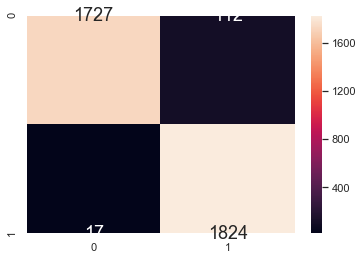

In [110]:
# Predict Response w.r.t Predictors
y_train_pred = dectree.predict(X_train)

# Classification Accuracy
print("Classification Accuracy (Group 3 Train Set) \t:", dectree.score(X_train, y_train))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy (Group 3 Test Set) 	: 0.9510869565217391
Cross validation score :  0.8934782608695653


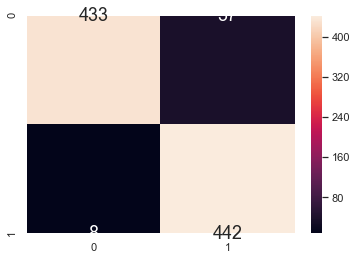

In [111]:
# Extract the two variables X_test and y_test
y_test = pd.DataFrame(group3_test['y'])
X_test = pd.DataFrame(group3_test)
X_test = X_test.drop(columns=['y'])

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy (Group 3 Test Set) \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 8,n_estimators = 100)
rf.fit(X_train, y_train)

y_train_preds = rf.predict_proba(X_train)[:,1]
y_test_preds = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score
roc_train = roc_auc_score(y_train,y_train_preds)
print("ROC AUC Score for Group 3 Train Set: ",roc_train)

roc_test = roc_auc_score(y_test,y_test_preds)
print("ROC AUC Score for Group 3 Test Set: ",roc_test)

from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators = 100)
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

C:\Users\darkm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ROC AUC Score for Group 3 Train Set:  0.9994585891595548
ROC AUC Score for Group 3 Test Set:  0.9998534278959812
Cross validation score :  0.9565217391304348


In [96]:
group4_train = group4.sample(frac=0.8)
group4_test = group4.sample(frac=0.2)

In [97]:
# Extract the two variables X_train and y_train
y_train = pd.DataFrame(group4_train['y'])
X_train = pd.DataFrame(group4_train)
X_train = X_train.drop(columns = ['y'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classification Accuracy (Group 4 Train Set) 	: 0.9486413043478261


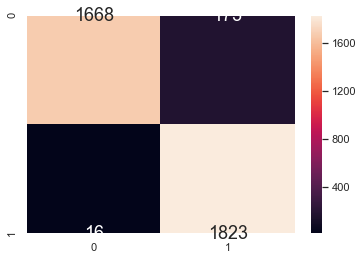

In [98]:
# Predict Response w.r.t Predictors
y_train_pred = dectree.predict(X_train)

# Classification Accuracy
print("Classification Accuracy (Group 4 Train Set) \t:", dectree.score(X_train, y_train))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy (Group 4 Test Set) 	: 0.9402173913043478
Cross validation score :  0.8749668634310991


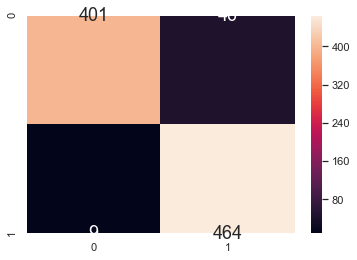

In [99]:
# Extract the two variables X_test and y_test
y_test = pd.DataFrame(group4_test['y'])
X_test = pd.DataFrame(group4_test)
X_test = X_test.drop(columns=['y'])

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy (Group 4 Test Set) \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 8,n_estimators = 100)
rf.fit(X_train, y_train)

y_train_preds = rf.predict_proba(X_train)[:,1]
y_test_preds = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score
roc_train = roc_auc_score(y_train,y_train_preds)
print("ROC AUC Score for Group 4 Train Set: ",roc_train)

roc_test = roc_auc_score(y_test,y_test_preds)
print("ROC AUC Score for Group 4 Test Set: ",roc_test)

clf = RandomForestClassifier(n_estimators = 100)
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

C:\Users\darkm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ROC AUC Score for Group 4 Train Set:  0.9996112947812189
ROC AUC Score for Group 4 Test Set:  0.9982878575043396
Cross validation score :  0.9619887592538363


In [101]:
group5_train = group5.sample(frac=0.8)
group5_test = group5.sample(frac=0.2)

In [102]:
# Extract the two variables X_train and y_train
y_train = pd.DataFrame(group5_train['y'])
X_train = pd.DataFrame(group5_train)
X_train = X_train.drop(columns = ['y'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classification Accuracy (Group 5 Train Set) 	: 0.9831521739130434


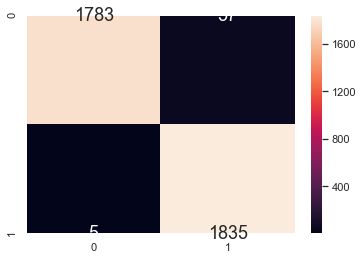

In [103]:
# Predict Response w.r.t Predictors
y_train_pred = dectree.predict(X_train)

# Classification Accuracy
print("Classification Accuracy (Group 5 Train Set) \t:", dectree.score(X_train, y_train))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy (Group 5 Test Set) 	: 0.975
Cross validation score :  0.9261204783995808


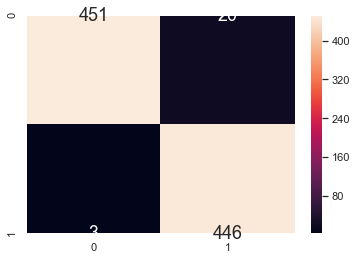

In [104]:
# Extract the two variables X_test and y_test
y_test = pd.DataFrame(group5_test['y'])
X_test = pd.DataFrame(group5_test)
X_test = X_test.drop(columns=['y'])

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy (Group 5 Test Set) \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 8,n_estimators = 100)
rf.fit(X_train, y_train)

y_train_preds = rf.predict_proba(X_train)[:,1]
y_test_preds = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score
roc_train = roc_auc_score(y_train,y_train_preds)
print("ROC AUC Score for Group 5 Train Set: ",roc_train)

roc_test = roc_auc_score(y_test,y_test_preds)
print("ROC AUC Score for Group 5 Test Set: ",roc_test)

from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators = 100)
y_test = np.ravel(y_test)
print("Cross validation score : ", np.mean(cross_val_score(clf, X_test, y_test, cv=10)))

C:\Users\darkm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ROC AUC Score for Group 5 Train Set:  0.9999595344990548
ROC AUC Score for Group 5 Test Set:  0.9999527139810571
Cross validation score :  0.9934780039969381


In [106]:
# In Conclusion, DecTree & Random Forest shows that class 3 is the best in predicting occurence of seizures.

In [114]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [116]:
feature_importances.head()

,importance
X12,0.033393
X159,0.021311
X34,0.019565
X38,0.018642
X112,0.018080


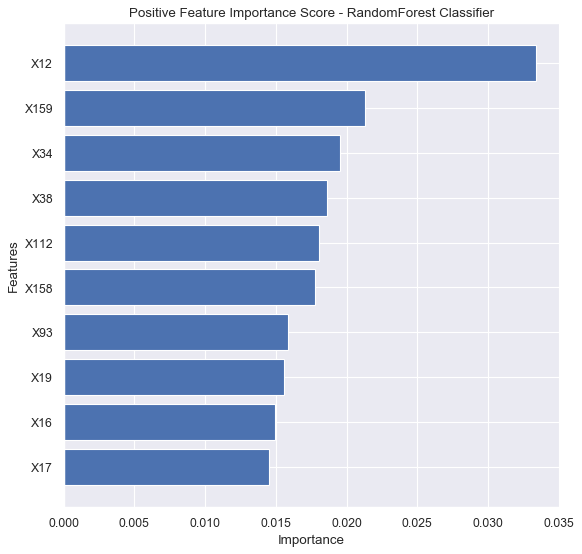

In [132]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([10, len(pos_features)])
ylocs = np.arange(num)
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Positive Feature Importance Score - RandomForest Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()